# TASK 01) TITANIC SURVIVAL PREDICTION

### Loading Libraries

In [230]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier, plot_tree 

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, roc_auc_score 


### Reading the dataset file using pandas

In [231]:

df = pd.read_csv("tested.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Identifying and handling missing values

In [232]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [233]:
mean_age = df['Age'].mean()

df['Age'].fillna(mean_age, inplace=True)

median_fare = df['Fare'].median()

df['Fare'].fillna(median_fare, inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [234]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [235]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Checking the Correlation between the features

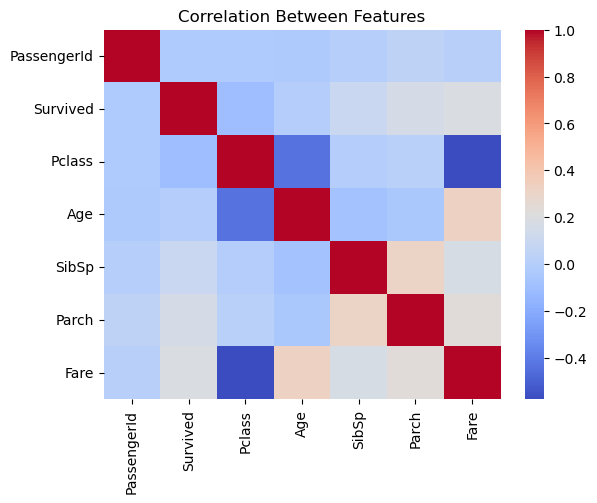

In [236]:
sns.heatmap(df.corr(), cmap='coolwarm')

plt.title('Correlation Between Features')

plt.show()

### Dropping Irrelevant Columns that are not useful

In [237]:
columns_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

df.drop(columns=columns_drop, inplace=True)

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


### Checking the dataset info

In [238]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None


### Mapping and Applying Label Encoding

In [239]:
sex_mapping = {'male': 0, 'female': 1}

df['Sex'] = df['Sex'].map(sex_mapping)

embarked_mapping = {'Q': 0, 'S': 1, 'C': 2}

df['Embarked'] = df['Embarked'].map(embarked_mapping)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,0
1,1,3,1,47.00000,1,0,7.0000,1
2,0,2,0,62.00000,0,0,9.6875,0
3,0,3,0,27.00000,0,0,8.6625,1
4,1,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,1
414,1,1,1,39.00000,0,0,108.9000,2
415,0,3,0,38.50000,0,0,7.2500,1
416,0,3,0,30.27259,0,0,8.0500,1


### Checking the Datatypes

In [240]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


### Again checking the Correlation

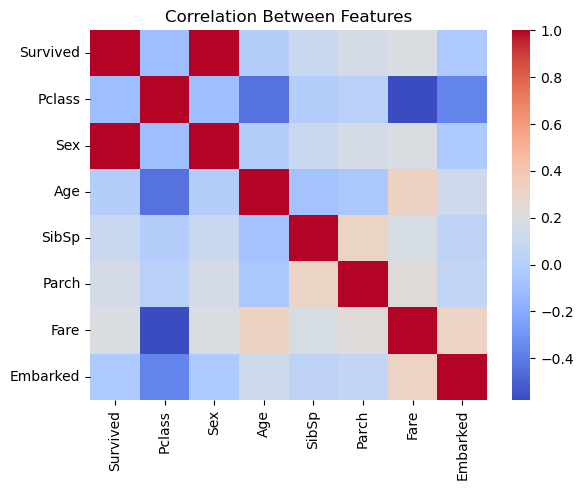

In [241]:
sns.heatmap(df.corr(), cmap='coolwarm')

plt.title('Correlation Between Features')

plt.show()

### Changing datatypes from float to int

In [242]:
df['Age'] = df['Age'].astype(int)

df['Fare'] = df['Fare'].round().astype(int)

In [243]:
print(df.dtypes)

Survived    int64
Pclass      int64
Sex         int64
Age         int32
SibSp       int64
Parch       int64
Fare        int32
Embarked    int64
dtype: object


### Training & Testing the Model

In [244]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = df[features]

y = df['Survived']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
clf = DecisionTreeClassifier(criterion ='entropy', max_depth = 3) 

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [247]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [248]:
classification_report = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_report)

roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

ROC AUC Score: 1.0


[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.937\nsamples = 334\nvalue = [216, 118]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 216\nvalue = [216, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 118\nvalue = [0, 118]')]

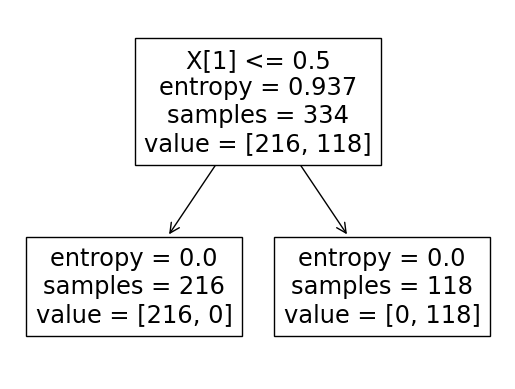

In [249]:
plot_tree(clf)